In [7]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle 
import pandas as pd
import numpy as np

In [45]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

In [46]:
res = requests.get(url)

In [47]:
vacancies = res.json()

In [11]:
vac_items = vacancies.get('items')

In [12]:
vac_items

[{'id': '42937495',
  'premium': False,
  'name': 'Chief Information Security Officer',
  'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'},
  'has_test': False,
  'response_letter_required': False,
  'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
  'salary': None,
  'type': {'id': 'open', 'name': 'Открытая'},
  'address': None,
  'response_url': None,
  'sort_point_distance': None,
  'published_at': '2021-04-05T10:31:12+0300',
  'created_at': '2021-04-05T10:31:12+0300',
  'archived': False,
  'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=42937495',
  'insider_interview': None,
  'url': 'https://api.hh.ru/vacancies/42937495?host=hh.ru',
  'alternate_url': 'https://hh.ru/vacancy/42937495',
  'relations': [],
  'employer': {'id': '3529',
   'name': 'Сбербанк',
   'url': 'https://api.hh.ru/employers/3529',
   'alternate_url': 'https://hh.ru/employer/3529',
   'logo_urls': {'original': 'https://hhcdn.ru/employer-lo

Вытаскиваю все описания этих вакансий

In [13]:
vac_items = vacancies.get('items')
vac_df = pd.DataFrame(vac_items)
vac_snippets_df = pd.DataFrame([line for line in vac_df.get('snippet')] )
vac_snippets_df['ID'] = [el for el in vac_df.get('id')]
vac_snippets_df

,requirement,responsibility,ID
0,Опыт работы в IT или информационной безопаснос...,"Создание, развёртывание, организация сопровожд...",42937495
1,Высшее образование (экономическое/техническое)...,Осуществление учёта соответствия рабочих мест ...,43733721
2,у тебя есть опыт функционального и интеграцион...,используешь на практике техники тест-дизайна.,42989839
3,Образование: высшее/неоконченное высшее технич...,Выполнение типовых операций по планированию ра...,43487089
4,"Опыт работы в сфере маркетинга, бренда-менеджм...",Участие в разработке и реализации маркетингово...,43956916
...,...,...,...
95,Профильное высшее юридическое образование. Опы...,Составление договоров/дополнительных соглашени...,42938634
96,Опыт коммерческой разработки (или активного фр...,Отвечать за архитектуру системы и за техничеко...,43717452
97,Умеете работать c Figma и другими системами пр...,Cоздавать дизайн-макеты на основе предоставлен...,43915790
98,"Опыт управления разработкой, внедрением и сопр...",Проводить дизайн-мышление. Формировать новый к...,43414338


Перевожу даты публикаций в datetime

In [14]:
vac_snippets_df['Published_at'] = [pd.to_datetime(line) for line in vac_df.get('published_at')]
vac_snippets_df['Published_at'] = vac_snippets_df['Published_at'].dt.tz_convert(None)
vac_snippets_df

,requirement,responsibility,ID,Published_at
0,Опыт работы в IT или информационной безопаснос...,"Создание, развёртывание, организация сопровожд...",42937495,2021-04-05 07:31:12
1,Высшее образование (экономическое/техническое)...,Осуществление учёта соответствия рабочих мест ...,43733721,2021-04-08 15:15:28
2,у тебя есть опыт функционального и интеграцион...,используешь на практике техники тест-дизайна.,42989839,2021-04-13 12:23:40
3,Образование: высшее/неоконченное высшее технич...,Выполнение типовых операций по планированию ра...,43487089,2021-03-31 07:00:07
4,"Опыт работы в сфере маркетинга, бренда-менеджм...",Участие в разработке и реализации маркетингово...,43956916,2021-04-16 13:00:21
...,...,...,...,...
95,Профильное высшее юридическое образование. Опы...,Составление договоров/дополнительных соглашени...,42938634,2021-03-20 21:54:53
96,Опыт коммерческой разработки (или активного фр...,Отвечать за архитектуру системы и за техничеко...,43717452,2021-04-08 08:51:31
97,Умеете работать c Figma и другими системами пр...,Cоздавать дизайн-макеты на основе предоставлен...,43915790,2021-04-15 09:46:11
98,"Опыт управления разработкой, внедрением и сопр...",Проводить дизайн-мышление. Формировать новый к...,43414338,2021-03-29 07:46:21


Строим график опубликованных вакансий по датам

In [15]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
%matplotlib inline

In [16]:
vac_snippets_df_sorted = vac_snippets_df.sort_values(by = 'Published_at')

In [17]:

vac_snippets_df_sorted['weekday'] = vac_snippets_df_sorted['Published_at'].dt.dayofweek
vac_snippets_df_sorted

,requirement,responsibility,ID,Published_at,weekday
83,Высшее образование (финансы/банки/международны...,"Реализация мероприятий, направленных на увелич...",43183275,2021-03-19 08:49:43,4
90,Опыт в системном анализе от 2х лет. Понимание ...,"Сбор, анализ и документирование требований. Пр...",43197721,2021-03-19 14:15:54,4
63,Опыт личной успешной реализации крупных инвест...,Руководство крупным строительным проектом (bro...,43200626,2021-03-19 16:32:17,4
16,"Знание Swift на продвинутом уровне, понимание ...",None,42360867,2021-03-20 18:09:30,5
61,Опыт разработки на Swift от 2-х лет (знания Ob...,В основе проекта лежит автоматизированная сист...,40413199,2021-03-20 18:16:50,5
...,...,...,...,...,...
22,Высшее образование (либо последний курс). Глуб...,Анализ автоматизированных систем и процессов о...,43943991,2021-04-16 08:14:29,4
21,"Хорошие знания Java или Kotlin, желание писать...",Участвовать в процессе разработки по SCRUM мет...,43690428,2021-04-16 08:37:33,4
81,"Опыт работы на позиции Владельца продукта, Тим...",Управление группой продуктов электронного доку...,43108355,2021-04-16 08:55:35,4
60,"Навыки структурирования проектов, задач и инфо...",Центр реализации Федпроекта по ИИ в рамках Деп...,43949128,2021-04-16 10:00:56,4


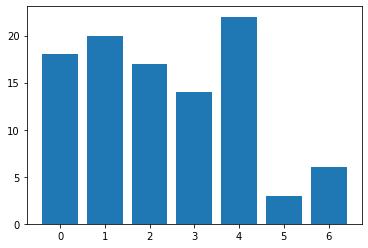

4    22
1    20
0    18
2    17
3    14
6     6
5     3
Name: weekday, dtype: int64

In [20]:
vac_counted_weekdays = vac_snippets_df_sorted['weekday'].value_counts()
plt.bar(vac_counted_weekdays.index , vac_counted_weekdays.values)
plt.show()
vac_counted_weekdays

In [19]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти) ЦИКЛ!!!
## Вытащите все описания этих вакансий
## Создайте аналогичный vacancy DataFrame только добавьте поле skills
## Переведите даты публикаций в datetime
## Постройте график опубликованных вакансий по датам
## Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
## Найдите те вакансии с использованием python, которые вам интересны
## Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

Создаю DATAFRAME с добавлением поля Skills

In [48]:
all_vacancy_ids = []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    vacancies = res.json()
    num_pages = vacancies.get('pages')
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

In [69]:
len(all_vacancy_ids)

1400

In [68]:
tabdict = defaultdict(list)
for vac_id in tqdm(all_vacancy_ids):
    
  
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vacancy = res.json()
    tabdict['id'].append(vacancy.get('id'))
    tabdict['name'].append(vacancy.get('name'))
    tabdict['description'].append(vacancy.get('description'))
    tabdict['skills'].append(vacancy.get('key_skills'))
    tabdict['published_at'].append(vacancy.get('published_at'))

In [118]:
df = pd.DataFrame(tabdict)

In [121]:
df.shape

(1400, 5)

In [124]:
df = pd.DataFrame(tabdict)

In [126]:
df

,id,name,description,skills,published_at
0,42937495,Chief Information Security Officer,<p><strong>Задачи:</strong></p><ul><li><p>Созд...,,2021-04-05T10:31:12+0300
1,43733721,Сервис-менеджер,<p><strong>Обязанности:</strong></p> <ul> <li>...,,2021-04-08T18:15:28+0300
2,42989839,Инженер функционального тестирования,<p>Мы ищем талантливого QA-инженера в сильную ...,,2021-04-13T15:23:40+0300
3,43487089,Инженер по планированию оборудования в ЦОД,<p><strong>Обязанности:</strong></p> <ul> <li>...,,2021-03-31T10:00:07+0300
4,43956916,Бренд-менеджер каталога приложений,"<p>SberDevices - новое направление компании, к...",,2021-04-16T16:00:21+0300
...,...,...,...,...,...
1395,42938634,Юрист (корпоративное право),"<p>В команду, подключающую компании экосистемы...","Деловое общение,Работа с базами данных,Консуль...",2021-03-21T00:54:53+0300
1396,43717452,.NET Backend разработчик,"<p>Компания «Сбербанк», блок Технологии, сейча...","Atlassian Jira,Entity Framework,Git,Linux,.NET...",2021-04-08T11:51:31+0300
1397,43915790,Дизайнер,<p><strong>Информация о проекте</strong></p> <...,,2021-04-15T12:46:11+0300
1398,43414338,Product Owner,<p><strong>Наша цель</strong> – создать доступ...,,2021-03-29T10:46:21+0300


Выбранный мною метод поиска вакансий с питоном и аналитиком не работает. Почему? подскажите пожалуйста.

In [143]:
python_vacs = df[df.skills.str.lower().str.contains('python')]

# python_vacs получается нормально, а вот после применения второго фильтра всё работает неправильно(показывает только 2 строки поочередно)

python_analyt_vacs = python_vacs[python_vacs.name.str.lower().str.contains('анали')]
python_analyt_vacs

,id,name,description,skills,published_at
26,43455612,Руководитель группы «Аналитического хаба»,<p><strong>Обязанности:</strong></p> <ul> <li>...,"Python,SQL,MS PowerPoint,MS SQL,MS Excel",2021-03-30T11:46:05+0300
80,43507249,Руководитель проектов (дэшборд стратегии/анали...,<p><em>Мы ищем кандидата на позицию Руководите...,"Управление проектами,SQL,MS SQL,Python,Анализ ...",2021-03-31T17:11:09+0300
126,43455612,Руководитель группы «Аналитического хаба»,<p><strong>Обязанности:</strong></p> <ul> <li>...,"Python,SQL,MS PowerPoint,MS SQL,MS Excel",2021-03-30T11:46:05+0300
180,43507249,Руководитель проектов (дэшборд стратегии/анали...,<p><em>Мы ищем кандидата на позицию Руководите...,"Управление проектами,SQL,MS SQL,Python,Анализ ...",2021-03-31T17:11:09+0300
226,43455612,Руководитель группы «Аналитического хаба»,<p><strong>Обязанности:</strong></p> <ul> <li>...,"Python,SQL,MS PowerPoint,MS SQL,MS Excel",2021-03-30T11:46:05+0300
280,43507249,Руководитель проектов (дэшборд стратегии/анали...,<p><em>Мы ищем кандидата на позицию Руководите...,"Управление проектами,SQL,MS SQL,Python,Анализ ...",2021-03-31T17:11:09+0300
326,43455612,Руководитель группы «Аналитического хаба»,<p><strong>Обязанности:</strong></p> <ul> <li>...,"Python,SQL,MS PowerPoint,MS SQL,MS Excel",2021-03-30T11:46:05+0300
380,43507249,Руководитель проектов (дэшборд стратегии/анали...,<p><em>Мы ищем кандидата на позицию Руководите...,"Управление проектами,SQL,MS SQL,Python,Анализ ...",2021-03-31T17:11:09+0300
426,43455612,Руководитель группы «Аналитического хаба»,<p><strong>Обязанности:</strong></p> <ul> <li>...,"Python,SQL,MS PowerPoint,MS SQL,MS Excel",2021-03-30T11:46:05+0300
480,43507249,Руководитель проектов (дэшборд стратегии/анали...,<p><em>Мы ищем кандидата на позицию Руководите...,"Управление проектами,SQL,MS SQL,Python,Анализ ...",2021-03-31T17:11:09+0300


In [116]:
interesting_name = 'аналитик'
interesting_skill = 'python'
term = df.name.str.lower().str.contains(interesting_name)
term2 = df.description.str.lower().str.contains(interesting_skill)
df[term&term2] #всё равно получается не правильно

,id,name,description,skills,published_at
17,43638516,Количественный аналитик Инвестиционного центра,<p><strong>Функции:</strong></p><ul><li>Расчет...,,2021-04-06T10:30:55+0300
75,42987197,Руководитель направления по аналитике данных,<p><strong>Описание вакансии:</strong></p> <p>...,,2021-04-14T09:06:33+0300
80,43507249,Руководитель проектов (дэшборд стратегии/анали...,<p><em>Мы ищем кандидата на позицию Руководите...,"Управление проектами,SQL,MS SQL,Python,Анализ ...",2021-03-31T17:11:09+0300
117,43638516,Количественный аналитик Инвестиционного центра,<p><strong>Функции:</strong></p><ul><li>Расчет...,,2021-04-06T10:30:55+0300
175,42987197,Руководитель направления по аналитике данных,<p><strong>Описание вакансии:</strong></p> <p>...,,2021-04-14T09:06:33+0300
180,43507249,Руководитель проектов (дэшборд стратегии/анали...,<p><em>Мы ищем кандидата на позицию Руководите...,"Управление проектами,SQL,MS SQL,Python,Анализ ...",2021-03-31T17:11:09+0300
217,43638516,Количественный аналитик Инвестиционного центра,<p><strong>Функции:</strong></p><ul><li>Расчет...,,2021-04-06T10:30:55+0300
275,42987197,Руководитель направления по аналитике данных,<p><strong>Описание вакансии:</strong></p> <p>...,,2021-04-14T09:06:33+0300
280,43507249,Руководитель проектов (дэшборд стратегии/анали...,<p><em>Мы ищем кандидата на позицию Руководите...,"Управление проектами,SQL,MS SQL,Python,Анализ ...",2021-03-31T17:11:09+0300
317,43638516,Количественный аналитик Инвестиционного центра,<p><strong>Функции:</strong></p><ul><li>Расчет...,,2021-04-06T10:30:55+0300


In [176]:
# посколько вознкиает ошибка, для определения наиболее востребованных скиллов  беру выборку python_vacs (т.е. что упоминают в дополнение/вместо пайтона)

In [173]:
py_vacs_skill_list = ','.join([x for x in python_vacs.skills if x]).split(',')
py_vacs_skill_list

['Python',
 'SQL',
 'SCALA',
 'C++',
 'MS Access',
 'Python',
 'Java',
 'Навыки межличностного общения',
 'Подготовка презентаций',
 'Python',
 'PostgreSQL',
 'SQL',
 'REST',
 'C++',
 'Python',
 'Java',
 'SQL',
 'Python',
 'SQL',
 'MS PowerPoint',
 'MS SQL',
 'MS Excel',
 'Python',
 'Git',
 'PostgreSQL',
 'Linux',
 'MySQL',
 'Nginx',
 'Linux',
 'Python',
 'Git',
 'Bash',
 'Подготовка презентаций',
 'Навыки презентации',
 'Python',
 'Java',
 'Python',
 'Написание научный статей',
 'R',
 'Анализ научных статей',
 'Python',
 'SQL',
 'MS SQL',
 'MS Excel',
 'Управление проектами',
 'SQL',
 'MS SQL',
 'Python',
 'Анализ данных',
 'Стратегическое мышление',
 'Сбор и анализ информации',
 'Python',
 'SQL',
 'SCALA',
 'C++',
 'MS Access',
 'Python',
 'Java',
 'Навыки межличностного общения',
 'Подготовка презентаций',
 'Python',
 'PostgreSQL',
 'SQL',
 'REST',
 'C++',
 'Python',
 'Java',
 'SQL',
 'Python',
 'SQL',
 'MS PowerPoint',
 'MS SQL',
 'MS Excel',
 'Python',
 'Git',
 'PostgreSQL',
 'Lin

In [149]:
from collections import Counter

In [199]:
skills_counted = Counter(py_vacs_skill_list)
skills_counted['Python'] = 0
skills_counted.most_common(15)

[('SQL', 84),
 ('Java', 42),
 ('MS SQL', 42),
 ('C++', 28),
 ('Подготовка презентаций', 28),
 ('PostgreSQL', 28),
 ('MS Excel', 28),
 ('Git', 28),
 ('Linux', 28),
 ('SCALA', 14),
 ('MS Access', 14),
 ('Навыки межличностного общения', 14),
 ('REST', 14),
 ('MS PowerPoint', 14),
 ('MySQL', 14)]

In [209]:

skills_count_sort = pd.DataFrame(skills_counted.most_common())
skills_count_sort.columns= ['skill','amount']
skills_count_sort

,skill,amount
0,SQL,84
1,Java,42
2,MS SQL,42
3,C++,28
4,Подготовка презентаций,28
5,PostgreSQL,28
6,MS Excel,28
7,Git,28
8,Linux,28
9,SCALA,14


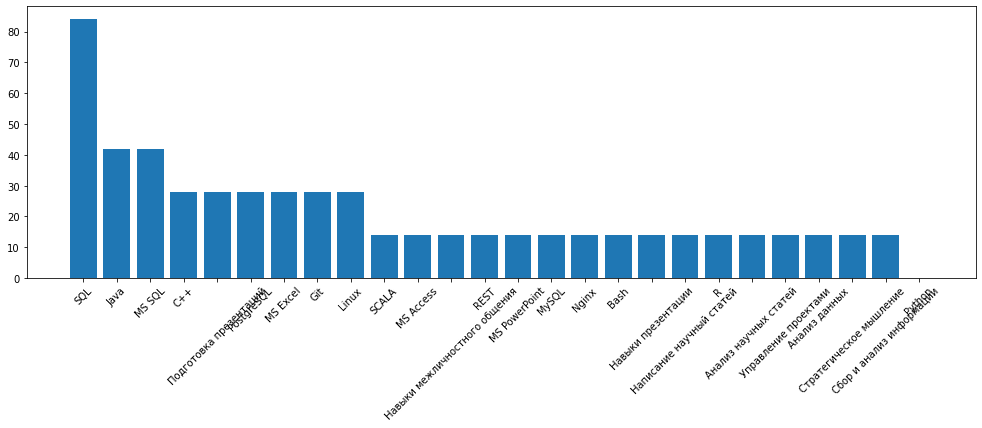

In [210]:
plt.figure(figsize=(17, 5))
plt.bar(skills_count_sort.skill,skills_count_sort.amount)
plt.xticks(rotation=45)
plt.show()